<a href="https://colab.research.google.com/github/ZuzannaBednarek/Calculator/blob/main/Projekt_drzewa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drzewa decyzyjne**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Drzewo decyzyjne** to struktora hierarchiczna przedstawiająca model klasyfikacyjny lub regresyjny. Stosowane są najczęściej, aby na podstawie wykresu wywnioskować, czym model kieruje się przy klasyfikacji.
Drzewo składa się z 

*   **korzenia** - "punkt startowy" 
*   **gałęzi** 
*   **węzłów decyzyjnych (wierzchołków)** 
*   **liści** - finalna klasyfikacja obiektu


# **Zalety**


*   Są łatwe w interpretacji i zrozumieniu.
*   Mogą być używane przy klasyfikacji, jak i przy regresji.
*   Nie wymagają zbyt skomplikowanego przygotowania danych w porównaniu z innymi algorytmami.
*   Dopuszczane są brakujące wartości w zbiorze danych.
*   Patrząc na drzewo decyzyjne możemy łatwo określić schemat postępowania, często stosowane są do prezentacji hipotez. 



# **Wady**


*   Overfitting - przeuczenie modelu, jeden z największych problemów przy drzewach.
*   Często przy małej zmianie w danych generowane jest zupełnie inne drzewo.
*   Proces uczenia przy drzewach zajmuje więcej czasu w porównaniu do innych algorytmów.




In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import figure
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


W dalszym etapie zajmiemy się pokazaniem dwóch metod tworzenia drzew decyzyjnych na podstawie danych dotyczących jakości wina - wine.csv.

Wstawiamy ścieżkę do pliku wine.csv umieszczonego na OneDrive.

In [6]:
path = '/content/drive/MyDrive/Colab Notebooks/Projekt_drzewa (1)/wine.csv'

In [7]:
#path = '/content/drive/MyDrive/wine.csv'

In [8]:
wine = pd.read_csv(path)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [9]:
x_1 = ('fixed_acidity','volatile_acidity','citric_acid','residual_sugar',	'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol')
y_1 = ('bad', 'good')

In [10]:
x = wine.drop('quality', axis=1)
y = wine['quality']

Podział zbioru na zbiór treningowy i zbiór testowy.

In [11]:
x_train, x_test , y_train, y_test = train_test_split(x, y, random_state = 1)

#**Drzewa decyzyjne metodą CART.**#

Algorytm CART wykorzystywany jest zarówno do drzew klasyfikacyjnych, jak i drzew regresyjnych. W tym przypadku zajmiemy się drzewami klasyfikacyjnymi, czyli kiedy zmienna objaśniana jest kategoryczna. Algorytmu wówczas używamy do zidentyfikowania klasy, do której należy dany element. W tym przypadku elementy przypisujemy do jednej z dwóch klas: ,,good” lub ,,bad”.​

Celem algorytmu jest znalezienie zbioru warunków podziału typu ,,jeżeli, to”, który prowadzi do jednoznacznego zaklasyfikowania obiektów. W algorytmie CART drzewo budowane jest w sposób rekursywny. Dla każdego węzła w drzewie wybierany jest optymalny podział elementów tego węzła na dwie grupy w oparciu o pojedynczą zmienną.​

Algorytm wyszukuje wszystkie możliwe podziały w analizowanym zbiorze.​

Jako reguły podziału najczęściej stosowanymi są entropia oraz indeks Giniego. ​

​

**Działanie algorytmu CART możemy podzielić na 3 etapy:​**

1. podział węzła według z góry ustalonych reguł;​
2. wyznaczenie optymalnych rozmiarów drzewa, z zastosowaniem odpowiedniego kryterium;​

3. przypisanie węzłów końcowych do klas.​

​

# **Indeks Gini'ego**

W algorytmie CART wykorzystywany jest do oceny jakości podziału węzła w drzewie.
Indeks Gini'ego określamy wzorem \\
> $G(P) = -\sum_{i}p_{i}(1-p_{i})$, \\

przy $P=(p_1,...,p_k)$, gdzie $p_i$ jest prawdopodobieństwem przynależności elementu do danej klasy.



# **Interpretacja** 
Indeks Gini’ego może przyjmować wartości od 0 do 1.​

*  Jeżeli wartość indeksu wynosi 0, to wszystkie elementy należą do konkretnej klasy.​

*  Jeżeli wartość indeksu wynosi 1, to elementy należą do różnych klas i są najbardziej rozproszone.​



Uogólniając, im większa wartość indeksu, tym większe rozproszenie elementów . ​

**Tworzenie drzewa z wykorzystaniem funkcji DecisionTreeClassifier - biblioteki scikit-learn.**

In [12]:
classifiergini = DecisionTreeClassifier(random_state=1) 
classifiergini.fit(x_train,y_train)
y_predgini = classifiergini.predict(x_test)

**Rysowanie drzewa**

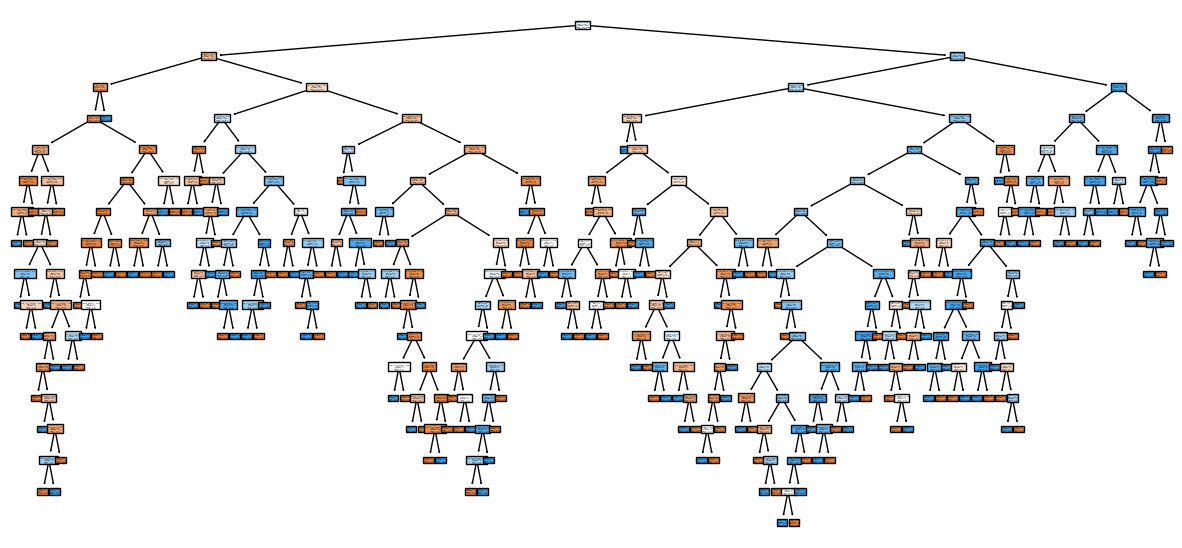

In [13]:
fig = plt.gcf()
fig.set_size_inches(15,7)
fig.set_dpi(100)
plot_tree(classifiergini,
                   feature_names=x_1,
                   class_names=y_1,
                   filled=True)

plt.show()

Widzimy, że drzewo na tym etapie jest przeuczone i nieczytelne.

**Obliczamy dokładność predykcyjną klasyfikatora porównując rzeczywiste dane zbioru testowego z przewidywanymi danymi.**

In [14]:
accuracy_score(y_test, y_predgini)

0.755

#**Przycinanie - Cost Complexity Pruning**

Jeżeli drzewo jest przeuczone i nieczytelne możemy użyć algorytmu, który w odpowiednich miejscach je zredukuje. W tym przypadku użyjemy metody Cost Complexity, gdzie minimalizujemy funkcję: \\

> $R_\alpha(T) = R(T)+\alpha|T|,$  \\


*   $|T|$ - liczba liści w drzewie T;
*   $R(T)$ - błąd klasyfikacji;
*   $\alpha$ - parametr minimalizujący powyższą funkcję, wyznaczający optymalne wymiary drzewa;
*   $R_\alpha(T)$ - miara funkcji.

In [15]:
path = classifiergini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

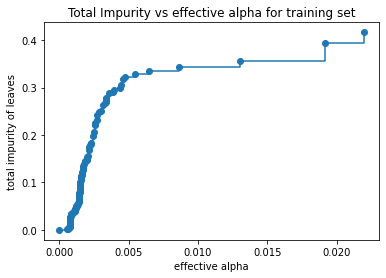

In [16]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [17]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

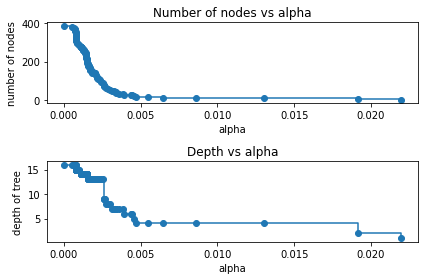

In [18]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Porównujemy alpha dla zbioru treningowego oraz zbioru testowego.**

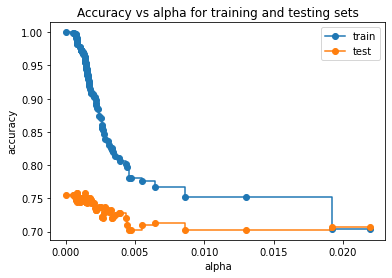

In [19]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Największą dokładność dla klasyfikatora osiągniemy przy największej wartości parametru alpha na zbiorze testowym, lecz drzewo przy wykorzystaniu takiego parametru jest nieczytelne. Patrząc na powyższe wykresy przyjmujemy wartość ok. 0.0045. Przy takiej wartości zachowujemy dokładność na poziomie ok. 0.7, a drzewo jest przejrzyste.

**Wartość alpha dodajemy jako parametr do funkcji tworzenia drzewa oraz obliczamy wartość predykcyjną dla tego parametru.**

In [20]:
classifierginiA = DecisionTreeClassifier(ccp_alpha=0.0045, random_state = 1) 
classifierginiA.fit(x_train,y_train)
y_predginiA = classifierginiA.predict(x_test)
accuracy_score(y_test, y_predginiA)

0.71

**Rysujemy drzewo dla wybranej wartości alpha.**

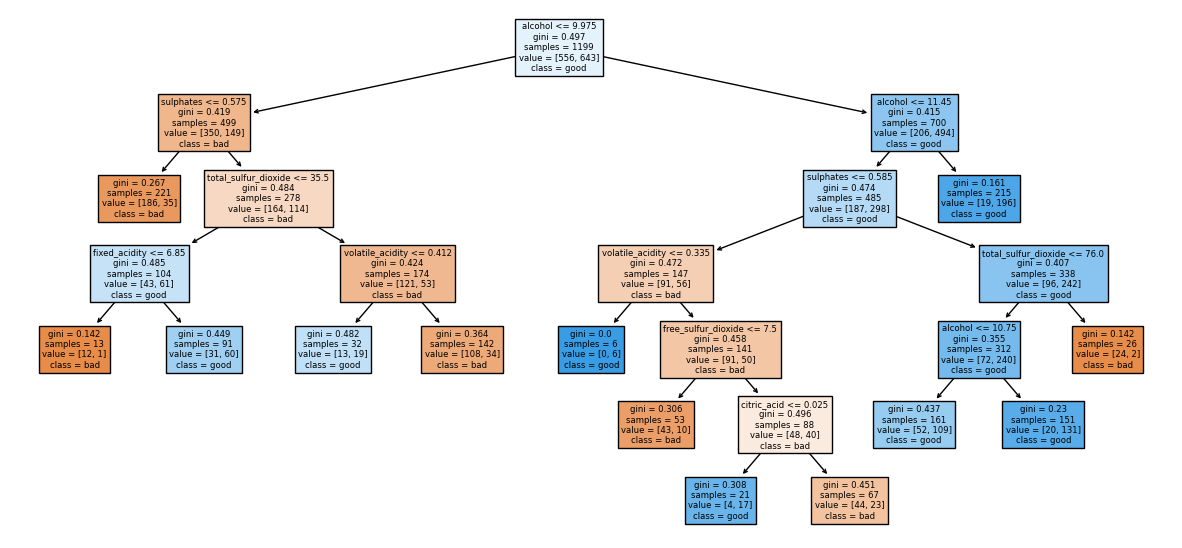

In [21]:
fig = plt.gcf()
fig.set_size_inches(15,7)
fig.set_dpi(100)
plot_tree(classifierginiA,
                   feature_names=x_1,
                   class_names=y_1,
                   filled=True)

plt.show()

Widać, że drzewo jest bardziej przejrzyste i czytelne, a dokładność pozostaje na wysokim poziomie.

**Macierz błędu**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


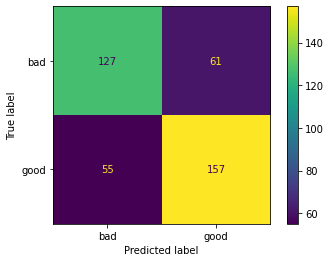

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifierginiA, x_test, y_test)


#Drzewo klasyfikacyjne metodą XGBoost

Stosunkowo nowy algorytm, który został przedstawiony w 2016 roku, wykorzystujący strukturę wzmacniającą gradient.

In [23]:
import xgboost as xgb

wine_enc = wine.copy()
wine_enc.columns = wine.columns.str.replace(" ", "_")
wine_enc.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


**One hot encoding dla wartości y.**

Metoda przekształcająca dane jakościowe, w naszym przypadku "good" i "bad", w wektory binarne.

In [24]:
y_test1 = pd.get_dummies(y_test)
y_test1 = y_test1.drop('bad', axis=1)
y_train1 = pd.get_dummies(y_train)
y_train1 = y_train1.drop('bad', axis=1)

Parametry:


*   objective='binary:logistic' - wykorzystanie regresji logistycznej dla klasyfikacji binarnej
*   early_stopping_rounds=10 - przedwczesne zatrzymanie
*   eval_metric='aucpr'- pole pod krzywą PR (Precision and recall)
*   eval_set=[(x_test, y_test1)] - dokonuje oceny modelu na podstawie danych x_test i y_test1



In [25]:
x_train.columns = x_train.columns.str.replace(" ", "_")
x_test.columns = x_test.columns.str.replace(" ", "_")
x_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
75,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5
1283,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2
408,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3
1281,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
1118,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3


In [26]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, random_state=1)
clf_xgb.fit(x_train,
            y_train1,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(x_test, y_test1)])

[0]	validation_0-aucpr:0.794617
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.815122
[2]	validation_0-aucpr:0.821883
[3]	validation_0-aucpr:0.828539
[4]	validation_0-aucpr:0.825307
[5]	validation_0-aucpr:0.824656
[6]	validation_0-aucpr:0.824294
[7]	validation_0-aucpr:0.829604
[8]	validation_0-aucpr:0.837748
[9]	validation_0-aucpr:0.842683
[10]	validation_0-aucpr:0.84077
[11]	validation_0-aucpr:0.842869
[12]	validation_0-aucpr:0.842899
[13]	validation_0-aucpr:0.843154
[14]	validation_0-aucpr:0.845974
[15]	validation_0-aucpr:0.847099
[16]	validation_0-aucpr:0.84758
[17]	validation_0-aucpr:0.845505
[18]	validation_0-aucpr:0.844885
[19]	validation_0-aucpr:0.848598
[20]	validation_0-aucpr:0.847886
[21]	validation_0-aucpr:0.847904
[22]	validation_0-aucpr:0.849559


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-aucpr:0.847238
[24]	validation_0-aucpr:0.847308
[25]	validation_0-aucpr:0.849354
[26]	validation_0-aucpr:0.851309
[27]	validation_0-aucpr:0.853077
[28]	validation_0-aucpr:0.852248
[29]	validation_0-aucpr:0.851848
[30]	validation_0-aucpr:0.851879
[31]	validation_0-aucpr:0.853215
[32]	validation_0-aucpr:0.853821
[33]	validation_0-aucpr:0.853812
[34]	validation_0-aucpr:0.853127
[35]	validation_0-aucpr:0.852475
[36]	validation_0-aucpr:0.852618
[37]	validation_0-aucpr:0.852431
[38]	validation_0-aucpr:0.851788
[39]	validation_0-aucpr:0.853174
[40]	validation_0-aucpr:0.853022
[41]	validation_0-aucpr:0.852827
[42]	validation_0-aucpr:0.852464
Stopping. Best iteration:
[32]	validation_0-aucpr:0.853821



XGBClassifier(random_state=1)

**Macierz błędu**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


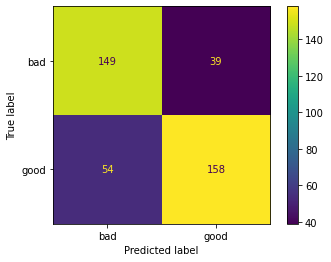

In [27]:
plot_confusion_matrix(clf_xgb, x_test, y_test1,
                      display_labels=['bad', 'good'])

In [28]:

(149+158)/(149+158+54+39)

0.7675

**Szukanie najlepszych parametrów** - model dobiera je wykorzystując technikę cross-validation

param_grid - słownik, w którym podajemy różne parametry

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [6],
    'learning rate': [0.05,0.1],
    'reg_lambda': [0, 0.1],
    'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'min_child_weight':[13, 15, 17],
    'n_estimators': range(60, 220, 40),
}

In [30]:
#grid_search = GridSearchCV(clf_xgb, 
#                           param_grid,
#                           scoring='roc_auc',
#                           cv=10,
#                           n_jobs=10)
#grid_search.fit(x_train, np.ravel(y_train1))

Szukanie najlepszych parametrów.

In [31]:
#grid_search.best_estimator_
#0 s
#(learning rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3)
#(gamma=10, learning rate=0, max_depth=9, reg_lambda=0, scale_pos_weight=3)
#(gamma=10, learning rate=0.5, max_depth=11, reg_lambda=0.1, scale_pos_weight=4)
#(gamma=10, learning rate=0.5, max_depth=11, reg_lambda=0.1, scale_pos_weight=4)

#(gamma=8, learning rate=0.1, max_depth=11, reg_lambda=0.1, scale_pos_weight=6)
#(gamma=8, learning rate=0.05, max_depth=11, reg_lambda=0, scale_pos_weight=7)
#(gamma=8, learning rate=0.05, max_depth=11, random_state=1, reg_lambda=0, scale_pos_weight=7)


#(gamma=0.5, learning rate=0.05, max_depth=6, random_state=1, reg_lambda=0.1, scale_pos_weight=6)
#(gamma=0.4, learning rate=0.05, max_depth=6, n_estimators=180, random_state=1, reg_lambda=0.1)
#(gamma=0.0, learning rate=0.05, max_depth=6, min_child_weight=13, n_estimators=180, random_state=1, reg_lambda=0.1)


**Zoptymalizowana wersja**

In [32]:
clf_xgb_opt = xgb.XGBClassifier(objective='binary:logistic', missing=None,
                            gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=13, n_estimators=180, random_state=1, reg_lambda=0.1)
clf_xgb_opt.fit(x_train,
            y_train1,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(x_test, y_test1)])

[0]	validation_0-aucpr:0.782944
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.807394
[2]	validation_0-aucpr:0.80267
[3]	validation_0-aucpr:0.811831
[4]	validation_0-aucpr:0.825628
[5]	validation_0-aucpr:0.826421
[6]	validation_0-aucpr:0.828076
[7]	validation_0-aucpr:0.832551
[8]	validation_0-aucpr:0.835081
[9]	validation_0-aucpr:0.836255
[10]	validation_0-aucpr:0.83732
[11]	validation_0-aucpr:0.838423
[12]	validation_0-aucpr:0.841012
[13]	validation_0-aucpr:0.840444
[14]	validation_0-aucpr:0.840798
[15]	validation_0-aucpr:0.840385
[16]	validation_0-aucpr:0.841787
[17]	validation_0-aucpr:0.842789
[18]	validation_0-aucpr:0.844443
[19]	validation_0-aucpr:0.843512
[20]	validation_0-aucpr:0.845118
[21]	validation_0-aucpr:0.845759
[22]	validation_0-aucpr:0.845264
[23]	validation_0-aucpr:0.84684
[24]	validation_0-aucpr:0.848958
[25]	validation_0-aucpr:0.849652
[26]	validation_0-aucpr:0.84935
[27]	validation_0-aucpr:0.849274
[28]	validation_0-aucpr:

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[37]	validation_0-aucpr:0.853017
[38]	validation_0-aucpr:0.85328
[39]	validation_0-aucpr:0.853396
[40]	validation_0-aucpr:0.853842
[41]	validation_0-aucpr:0.853178
[42]	validation_0-aucpr:0.853235
[43]	validation_0-aucpr:0.853349
[44]	validation_0-aucpr:0.853413
[45]	validation_0-aucpr:0.853625
[46]	validation_0-aucpr:0.853101
[47]	validation_0-aucpr:0.85292
[48]	validation_0-aucpr:0.852592
[49]	validation_0-aucpr:0.85282
[50]	validation_0-aucpr:0.853472
Stopping. Best iteration:
[40]	validation_0-aucpr:0.853842



XGBClassifier(gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=13,
              n_estimators=180, random_state=1, reg_lambda=0.1)

In [33]:
y1 = pd.get_dummies(y)
y1 = y1.drop('bad', axis=1)

**Rysunek drzewa**

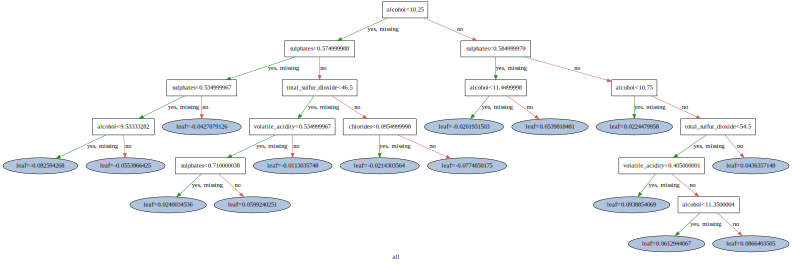

In [34]:
xgb.to_graphviz(clf_xgb_opt,
                num_trees=1, size="11", yes_color = 'forestgreen', no_color = 'indianred', 
                condition_node_params = {'shape':'box'},
                leaf_node_params = {'style': 'filled',
                                    'shape':'ellipse',
                                    'fillcolor': 'lightsteelblue'},
                label = 'all', class_names='good'
)

W liściach dostajemy wartość logit. Aby wyliczyć prawdopodobieństwo przynależności do klasy 'good' wynik podstawiamy do wzoru: 
> $p=\frac{e^{logit(p)}}{1+e^{logit(p)}}$.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


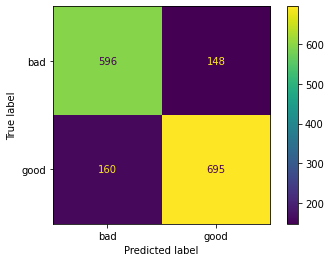

In [35]:
x.columns = x.columns.str.replace(" ", "_")
x.head()
plot_confusion_matrix(clf_xgb_opt, x, y1,
                      display_labels=['bad', 'good'])

**Macierz błędu**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


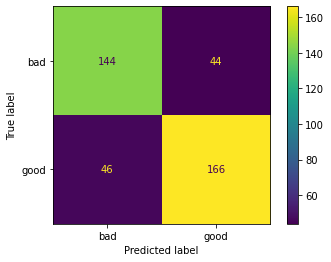

In [36]:
plot_confusion_matrix(clf_xgb_opt, x_test, y_test1,
                      display_labels=['bad', 'good'])

In [37]:
(144+166)/(144+166+44+46)

0.775

**Porównanie z metodą CART.**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- citric_acid
- fixed_acidity
- free_sulfur_dioxide
- residual_sugar
- total_sulfur_dioxide
- ...
Feature names seen at fit time, yet now missing:
- citric acid
- fixed acidity
- free sulfur dioxide
- residual sugar
- total sulfur dioxide
- ...

  warnings.warn(message, FutureWarning)


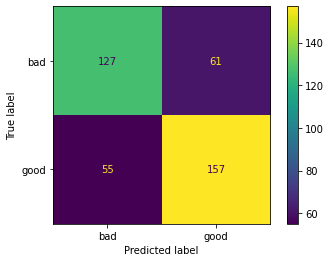

In [38]:
plot_confusion_matrix(classifierginiA, x_test, y_test)